In [74]:
#importnado bibliotecas que foram usadas (algumas não foram no final)
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from   sklearn.linear_model import LinearRegression
from   sklearn.metrics import r2_score

import scipy.stats as stats

In [75]:
#adicionando a base de dados utilizados no programa para fazer a regressão
dados_df = pd.read_excel("database2010.xlsx")
df = pd.read_excel("database2010.xlsx")
dados_df = dados_df.drop(['Municipios'],axis=1) #deletando a coluna com os municipios para ter apenas dados numéricos

In [76]:
#Rodando as estatisticas descritivas de todos os dados
dados_df.describe()

,tCO2epc,PIBpc,PIBpc2,PIBpc3,Agro,Ind,Serv,Dist,Sudeste,Norte,Sul,Centro-Oeste
count,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000
mean,2.229105,1.816162,4.211881,11.148438,-1.652561,-1.976812,-0.921116,5.270844,0.298559,0.080901,0.213874,0.083964
std,1.097593,0.955826,3.836238,15.017538,1.408768,0.694180,0.377459,0.833671,0.457667,0.272707,0.410076,0.277359
min,-0.835922,-0.698680,0.000003,-0.341063,-13.870908,-4.652561,-4.468078,1.287067,0.000000,0.000000,0.000000,0.000000
25%,1.437880,1.002920,1.005848,1.008786,-1.945577,-2.503178,-1.136328,4.805431,0.000000,0.000000,0.000000,0.000000
50%,2.138649,1.865107,3.478625,6.488009,-1.244720,-2.144480,-0.865235,5.429381,0.000000,0.000000,0.000000,0.000000
75%,2.899111,2.513561,6.317987,15.880643,-0.780110,-1.462349,-0.648607,5.882330,1.000000,0.000000,0.000000,0.000000
max,6.550875,5.723153,32.754480,187.458900,-0.112340,-0.030190,-0.143150,7.297279,1.000000,1.000000,1.000000,1.000000


In [77]:
#Analise de Correlção
dados_df.corr()

,tCO2epc,PIBpc,PIBpc2,PIBpc3,Agro,Ind,Serv,Dist,Sudeste,Norte,Sul,Centro-Oeste
tCO2epc,1.000000,0.189892,0.139118,0.097979,0.462631,-0.223736,-0.464860,0.363583,-0.104064,0.315194,0.085855,0.390117
PIBpc,0.189892,1.000000,0.954411,0.850545,-0.372319,0.459488,-0.393159,-0.075661,0.219791,-0.124074,0.402871,0.166459
PIBpc2,0.139118,0.954411,1.000000,0.964763,-0.430518,0.482990,-0.402104,-0.084329,0.184636,-0.130670,0.350977,0.136081
PIBpc3,0.097979,0.850545,0.964763,1.000000,-0.445162,0.461765,-0.389946,-0.088253,0.154819,-0.117064,0.266908,0.103042
Agro,0.462631,-0.372319,-0.430518,-0.445162,1.000000,-0.570484,-0.253619,0.445093,-0.233001,0.108409,0.062514,0.073135
Ind,-0.223736,0.459488,0.482990,0.461765,-0.570484,1.000000,-0.133677,-0.249896,0.187145,-0.057174,0.008256,-0.024197
Serv,-0.464860,-0.393159,-0.402104,-0.389946,-0.253619,-0.133677,1.000000,-0.058783,0.146750,-0.173203,-0.181152,-0.130085
Dist,0.363583,-0.075661,-0.084329,-0.088253,0.445093,-0.249896,-0.058783,1.000000,0.046355,0.044974,0.044162,-0.001006
Sudeste,-0.104064,0.219791,0.184636,0.154819,-0.233001,0.187145,0.146750,0.046355,1.000000,-0.193560,-0.340292,-0.197519
Norte,0.315194,-0.124074,-0.130670,-0.117064,0.108409,-0.057174,-0.173203,0.044974,-0.193560,1.000000,-0.154749,-0.089823


In [78]:
#definindo y para simplificar a escrita e uma matriz X com a constante para regressão
Y = 'tCO2epc'
dados_df_X = dados_df.drop(Y,axis=1)  
dados_df_X = sm.add_constant(dados_df_X)
#display(dados_df_X)

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [79]:
#definir as matrizes ao quadrado.  Cada matriz é um modelo quadrático que adiciona ou retira variáveis para analisar
#os diferentes resultados quando feita a regressão

matrix0 = dados_df_X.drop(['PIBpc3','Agro','Ind','Serv','Dist','Sudeste','Norte','Sul','Centro-Oeste'],axis=1)
matrix1 = dados_df_X.drop(['PIBpc3','Agro','Ind','Serv'],axis=1)
matrix2 = dados_df_X.drop(['PIBpc3','Dist','Sudeste','Norte','Sul','Centro-Oeste'],axis=1)
matrix3 = dados_df_X.drop(['PIBpc3'],axis=1)


In [80]:
#Modelo quadrático
modelo0 = sm.OLS(dados_df[Y],matrix0)
res0 = modelo0.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res0.summary())
display(res0.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     184.8
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           2.09e-78
Time:                        12:00:29   Log-Likelihood:                -8231.6
No. Observations:                5550   AIC:                         1.647e+04
Df Residuals:                    5547   BIC:                         1.649e+04
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4618      0.043     33.928      0.0

16489.054101661313

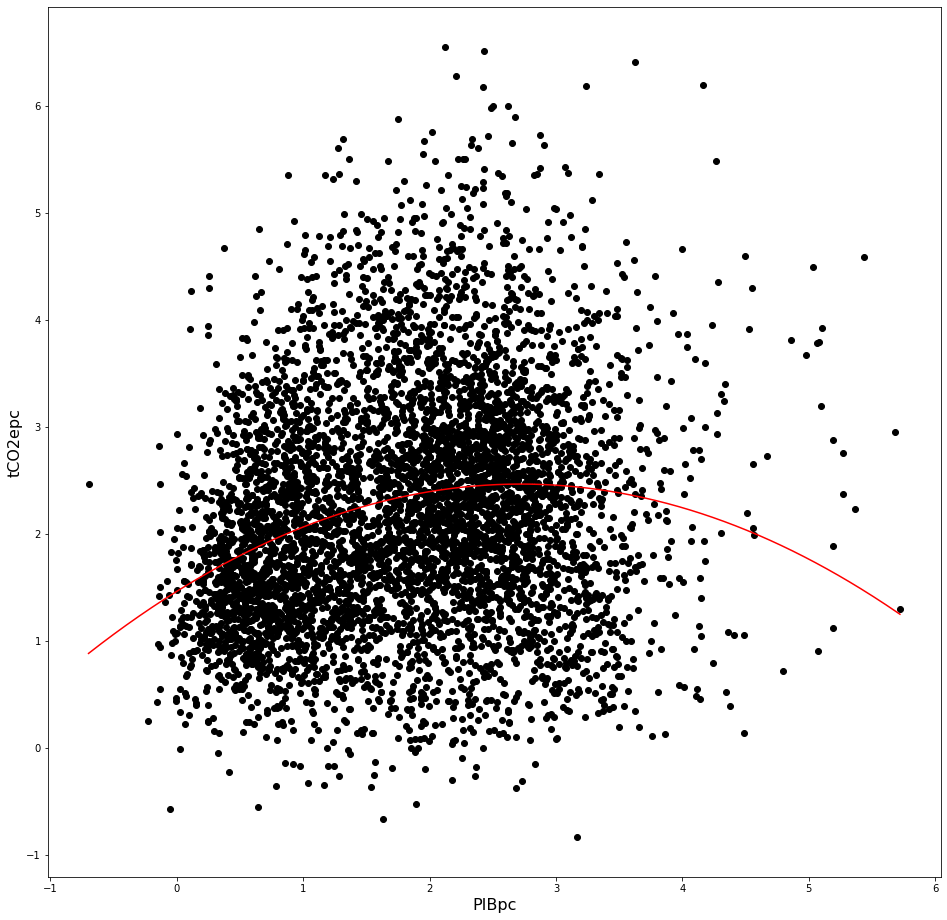

In [45]:
#Plotando um gráfico do modelo Quadrático 
plt.figure(figsize = (16,16)) #tamanho da figura
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01) #criando um vetor para os valores de X
ymod0 =  1.4618 + 0.7361*g  -0.1352*(g*g) #criando um vetor de Y a partir dos Betas do modelo especificado

ax1 = plt.subplot() #criando um subplot que é a variável do gráfico
ax1.set_xlabel('PIBpc',  fontsize=16) #Nome no eixo X
ax1.set_ylabel('tCO2epc', fontsize=16) #Nome no eixo Y
ax1.plot(g,ymod0 , color='red') #plotando o gráfico com as especificações definidas, g(que é o X) e Y1 (que é o Y) e definindo a cor preta
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

In [81]:
#Modelo quadratico com impacto regional
modelo = sm.OLS(dados_df[Y],matrix1)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     514.5
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:00:45   Log-Likelihood:                -6695.8
No. Observations:                5550   AIC:                         1.341e+04
Df Residuals:                    5542   BIC:                         1.346e+04
Df Model:                           7                                         
Covariance Type:                  HAC                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.8932      0.094     -9.515   

13460.63231132278

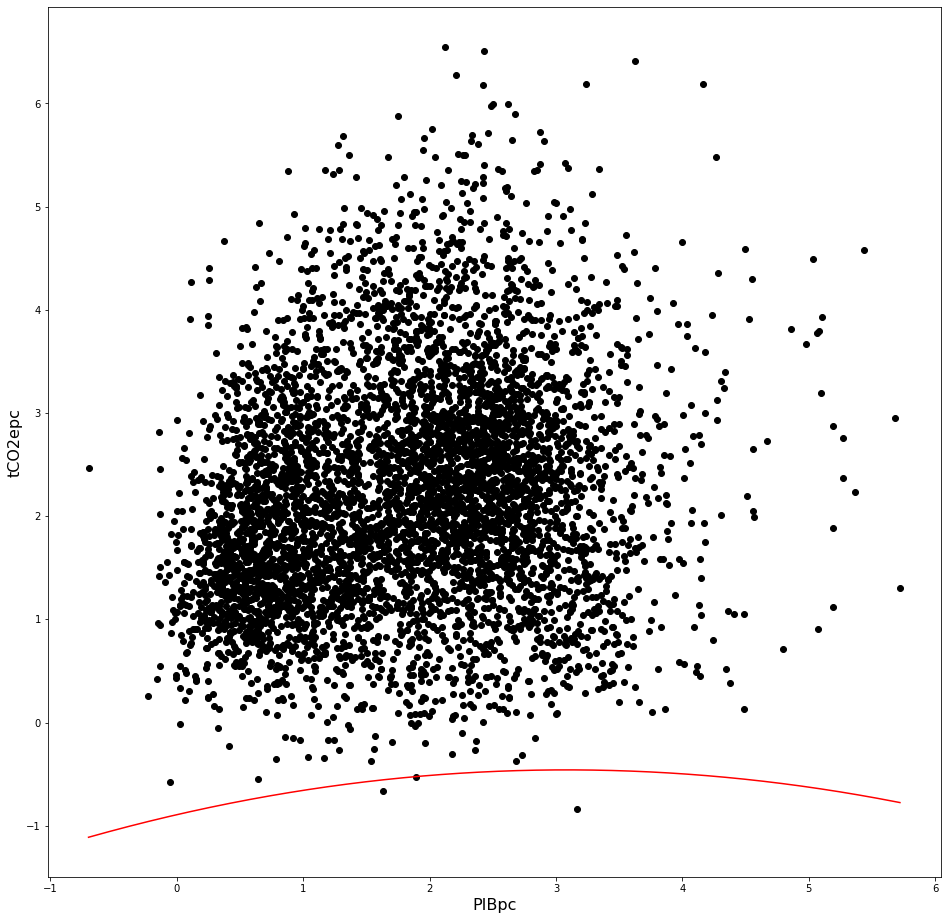

In [47]:
#Plotando um gráfico do modelo Quadrático com impacto regional
plt.figure(figsize = (16,16)) #tamanho da figura
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01) #criando um vetor para os valores de X
ymod1 = -0.8932 + 0.2814*g  -0.0456*(g*g) #criando um vetor de Y a partir dos Betas do modelo especificado

ax1 = plt.subplot() #criando um subplot que é a variável do gráfico
ax1.set_xlabel('PIBpc',  fontsize=16) #Nome no eixo X
ax1.set_ylabel('tCO2epc',  fontsize=16) #Nome no eixo Y
ax1.plot(g,ymod1 , color='red') #plotando o gráfico com as especificações definidas, g(que é o X) e Y1 (que é o Y) e definindo a cor preta
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

In [83]:
# Modelo quadratico com participação do VA dos 3 setores no PIB
modelo = sm.OLS(dados_df[Y],matrix2)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     663.7
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:10:01   Log-Likelihood:                -6910.7
No. Observations:                5550   AIC:                         1.383e+04
Df Residuals:                    5544   BIC:                         1.387e+04
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7908      0.100      7.893      0.0

13873.215235671874

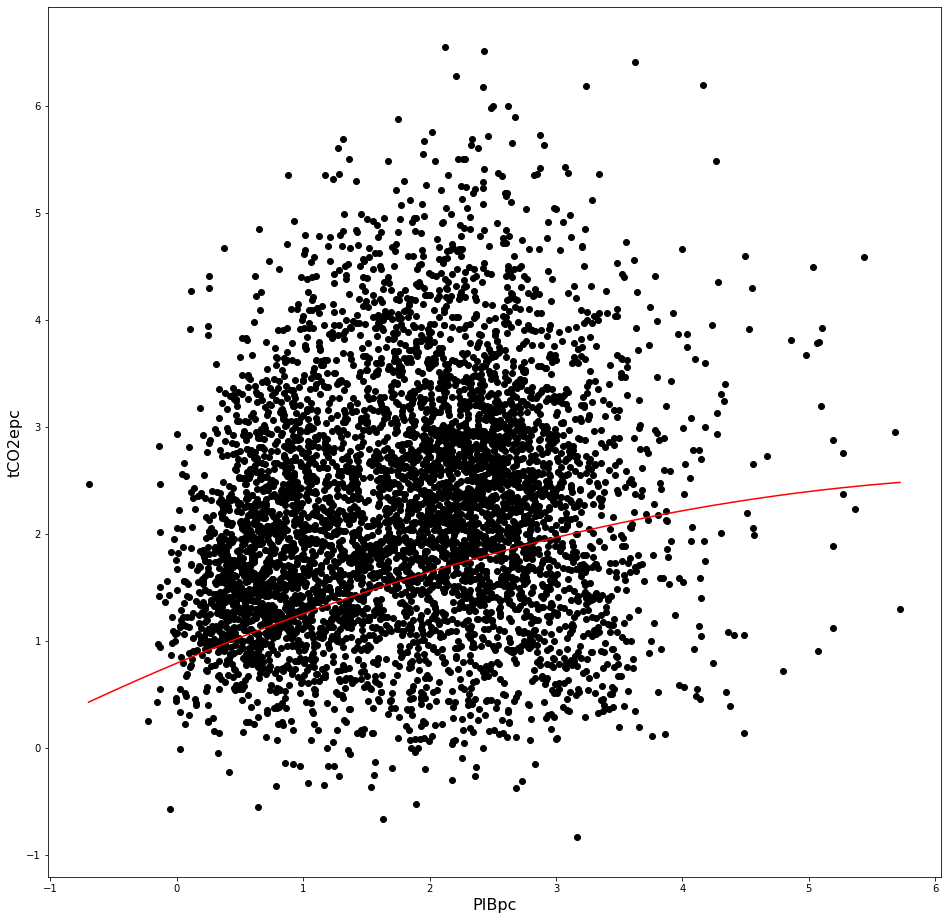

In [84]:
#Plotando um gráfico do Modelo quadratico com participação do VA dos 3 setores no PIB
plt.figure(figsize = (16,16)) #tamanho da figura
g = np.arange(df.PIBpc.min(),df.PIBpc.max(), 0.01) #criando um vetor para os valores de X
ymod2 = 0.7908 + 0.4971*g -0.0353*(g*g) #criando um vetor de Y a partir dos Betas do modelo especificado

ax1 = plt.subplot() #criando um subplot que é a variável do gráfico
ax1.set_xlabel('PIBpc',  fontsize=16) #Nome no eixo X
ax1.set_ylabel('tCO2epc',  fontsize=16) #Nome no eixo Y
ax1.plot(g,ymod2 , color='red') #plotando o gráfico com as especificações definidas, g(que é o X) e Y1 (que é o Y) e definindo a cor preta
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

In [86]:
#Modelo quadratico com impacto regional e VA dos setores do PIB
modelo = sm.OLS(dados_df[Y],matrix3)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     655.2
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:12:20   Log-Likelihood:                -5762.0
No. Observations:                5550   AIC:                         1.155e+04
Df Residuals:                    5539   BIC:                         1.162e+04
Df Model:                          10                                         
Covariance Type:                  HAC                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4157      0.128     -3.251   

11618.777445233807

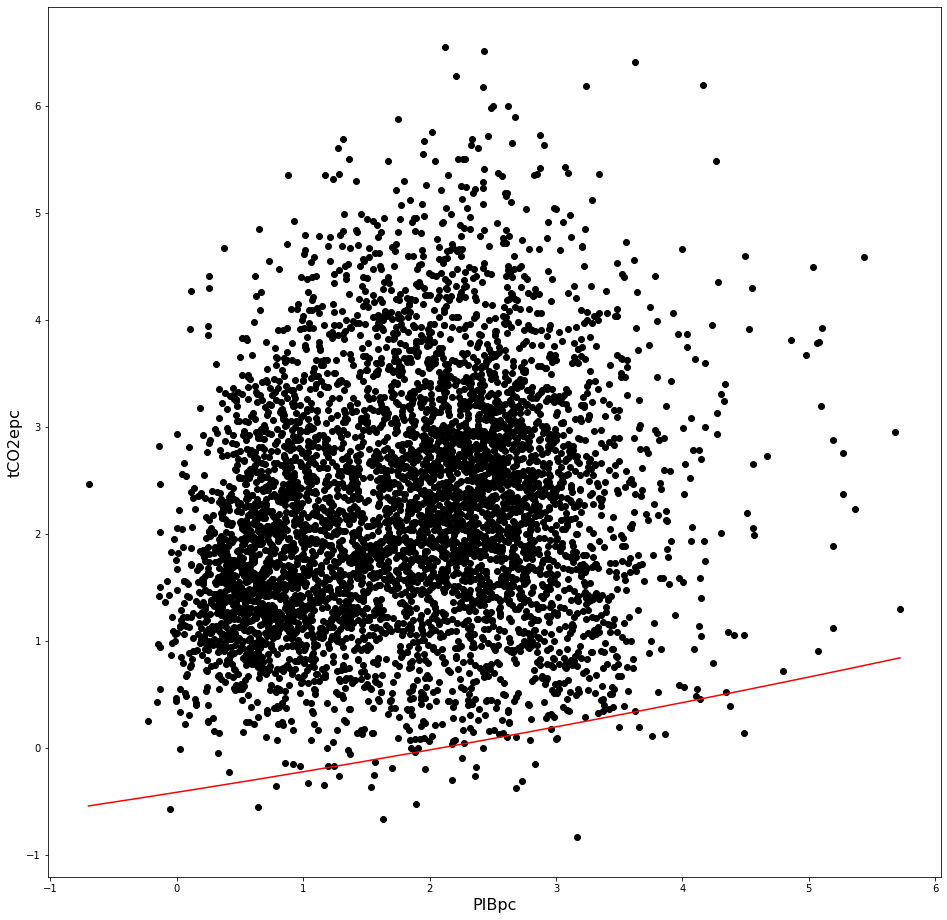

In [87]:
#Plotando um gráfico do modelo Quadrático com impacto regional e VA dos setores do PIB
plt.figure(figsize = (16,16)) #tamanho da figura
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01) #criando um vetor para os valores de X
ymod3 = -0.4157 + 0.1863*g + 0.0058*(g*g) #criando um vetor de Y a partir dos Betas do modelo especificado

ax1 = plt.subplot() #criando um subplot que é a variável do gráfico
ax1.set_xlabel('PIBpc', fontsize=16) #Nome no eixo X
ax1.set_ylabel('tCO2epc',  fontsize=16) #Nome no eixo Y
ax1.plot(g,ymod3 , color='red') #plotando o gráfico com as especificações definidas, g(que é o X) e Y1 (que é o Y) e definindo a cor preta
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

In [88]:
display(dados_df_X)

,const,PIBpc,PIBpc2,PIBpc3,Agro,Ind,Serv,Dist,Sudeste,Norte,Sul,Centro-Oeste
0,1.0,1.762411,3.106092,5.474209,-0.428118,-2.238423,-1.621074,4.634002,0,1,0,0
1,1.0,1.067176,1.138864,1.215367,-0.676864,-2.593433,-1.054885,5.394001,0,1,0,0
2,1.0,1.637383,2.681023,4.389861,-1.015116,-2.039722,-0.984518,5.039027,0,1,0,0
3,1.0,1.846776,3.410582,6.298582,-0.243183,-2.895537,-1.987938,3.104885,0,1,0,0
4,1.0,2.138849,4.574674,9.784536,-0.596750,-1.359582,-1.988103,4.216139,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5545,1.0,1.193851,1.425280,1.701572,-2.701399,-2.007468,-0.432723,6.091087,0,1,0,0
5546,1.0,2.508340,6.291768,15.781893,-0.465450,-2.388556,-1.487918,4.930532,0,1,0,0
5547,1.0,1.793662,3.217225,5.770615,-0.552995,-2.279118,-1.361968,5.313040,0,1,0,0
5548,1.0,1.475921,2.178344,3.215065,-1.781774,-1.541353,-0.705675,5.925798,0,1,0,0


In [89]:
#definir as matrizes cubicas pela letra B. Cada matriz é um modelo cubico que adiciona ou retira variáveis para analisar
#os diferentes resultados quando feita a regressão
matrix4 = dados_df_X.drop(['Agro','Ind','Serv','Dist','Sudeste','Norte','Sul','Centro-Oeste'],axis=1)
matrix5 = dados_df_X.drop(['Agro','Ind','Serv'],axis=1)
matrix6 = dados_df_X.drop(['Dist','Sudeste','Norte','Sul','Centro-Oeste'],axis=1)
matrix7 = dados_df_X


In [91]:
#Modelo cubico apenas os PIBpc
modelo = sm.OLS(dados_df[Y],matrix4)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     145.3
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           1.15e-90
Time:                        12:14:13   Log-Likelihood:                -8215.2
No. Observations:                5550   AIC:                         1.644e+04
Df Residuals:                    5546   BIC:                         1.646e+04
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2149      0.057     21.470      0.0

16464.837042133546

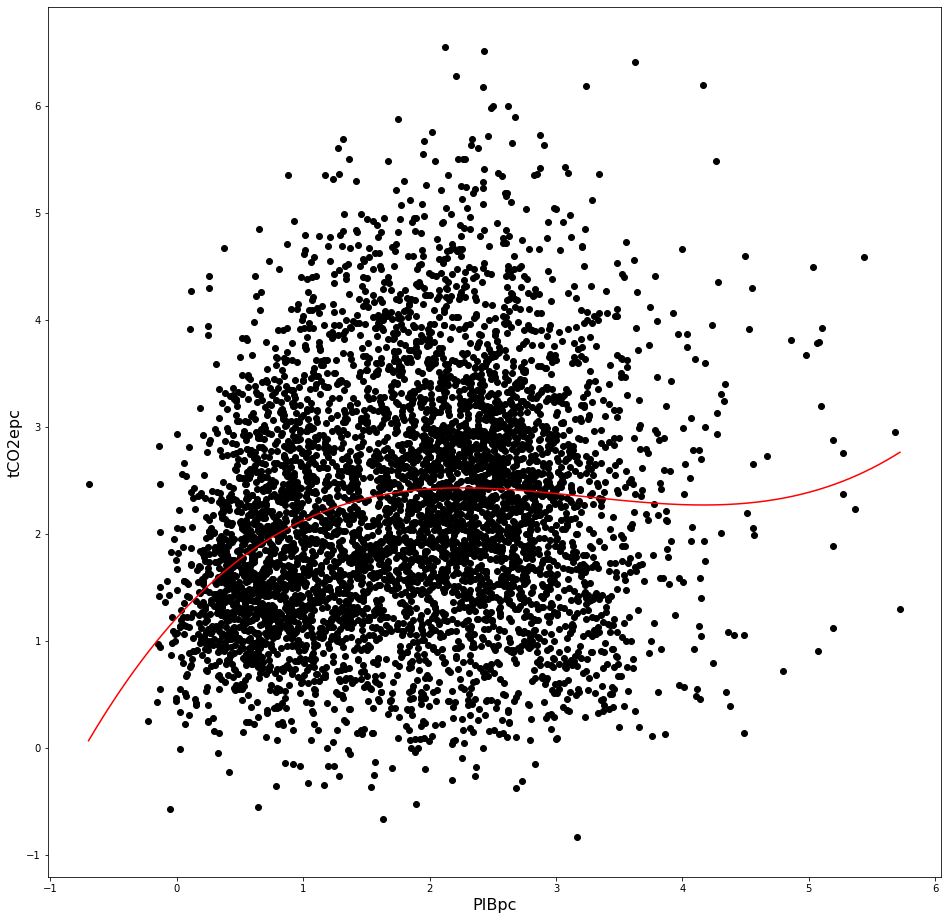

In [92]:
#Gráfico do Modelo cubico
plt.figure(figsize = (16,16))
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01)
ymod4 = 1.2149 + 1.3098*g -0.4466*(g*g) +  0.0463*(g*g*g)

ax1 = plt.subplot()
ax1.set_xlabel('PIBpc', fontsize=16)
ax1.set_ylabel('tCO2epc', fontsize=16)
ax1.plot(g,ymod4 , color='red')
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')


In [94]:
#Modelo cubico com impacto regional
modelo = sm.OLS(dados_df[Y],matrix5)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     463.4
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:17:08   Log-Likelihood:                -6669.4
No. Observations:                5550   AIC:                         1.336e+04
Df Residuals:                    5541   BIC:                         1.342e+04
Df Model:                           8                                         
Covariance Type:                  HAC                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1345      0.098    -11.571   

13416.361850335443

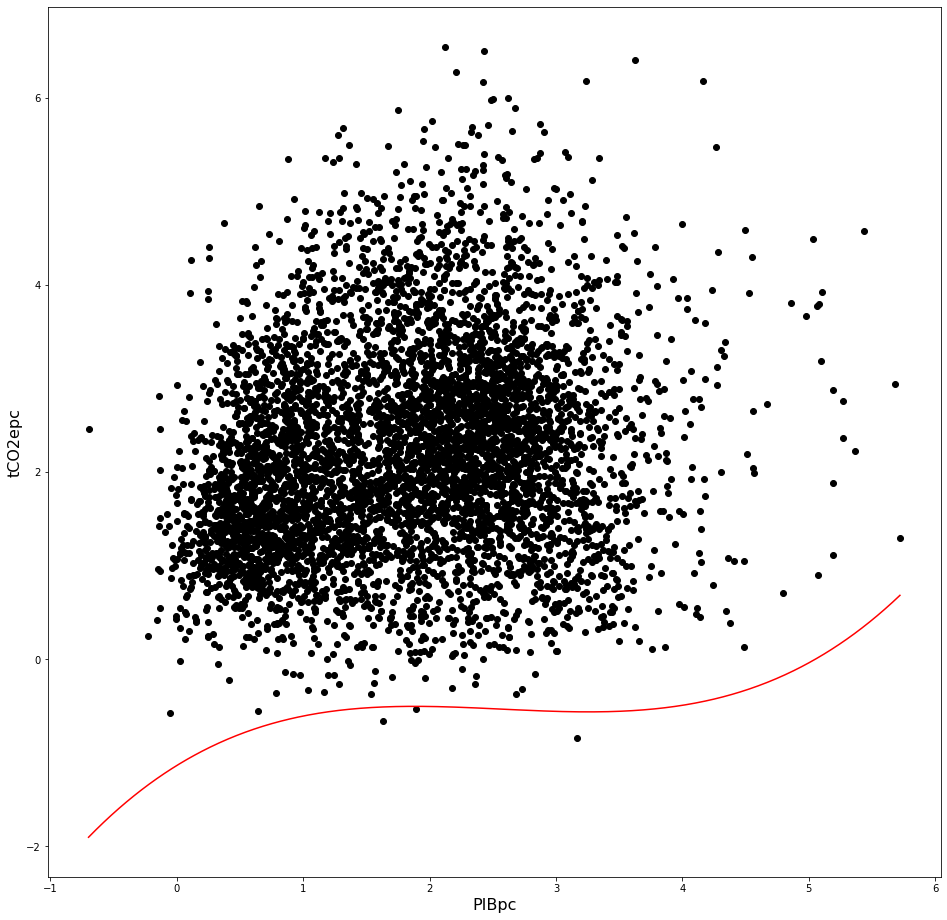

In [95]:
#Gráfico do Modelo cubico com impacto regional
plt.figure(figsize = (16,16))
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01)
ymod5 = -1.1345 + 0.8324*g -0.3491*(g*g) + 0.0453*(g*g*g)

ax1 = plt.subplot()
ax1.set_xlabel('PIBpc', fontsize=16)
ax1.set_ylabel('tCO2epc', fontsize=16)
ax1.plot(g,ymod5 , color='red')
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

In [97]:
# Modelo cubico com participação do VA dos 3 setores no PIB 
modelo = sm.OLS(dados_df[Y],matrix6)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     551.9
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:18:26   Log-Likelihood:                -6901.4
No. Observations:                5550   AIC:                         1.382e+04
Df Residuals:                    5543   BIC:                         1.386e+04
Df Model:                           6                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6799      0.105      6.496      0.0

13863.056488185417

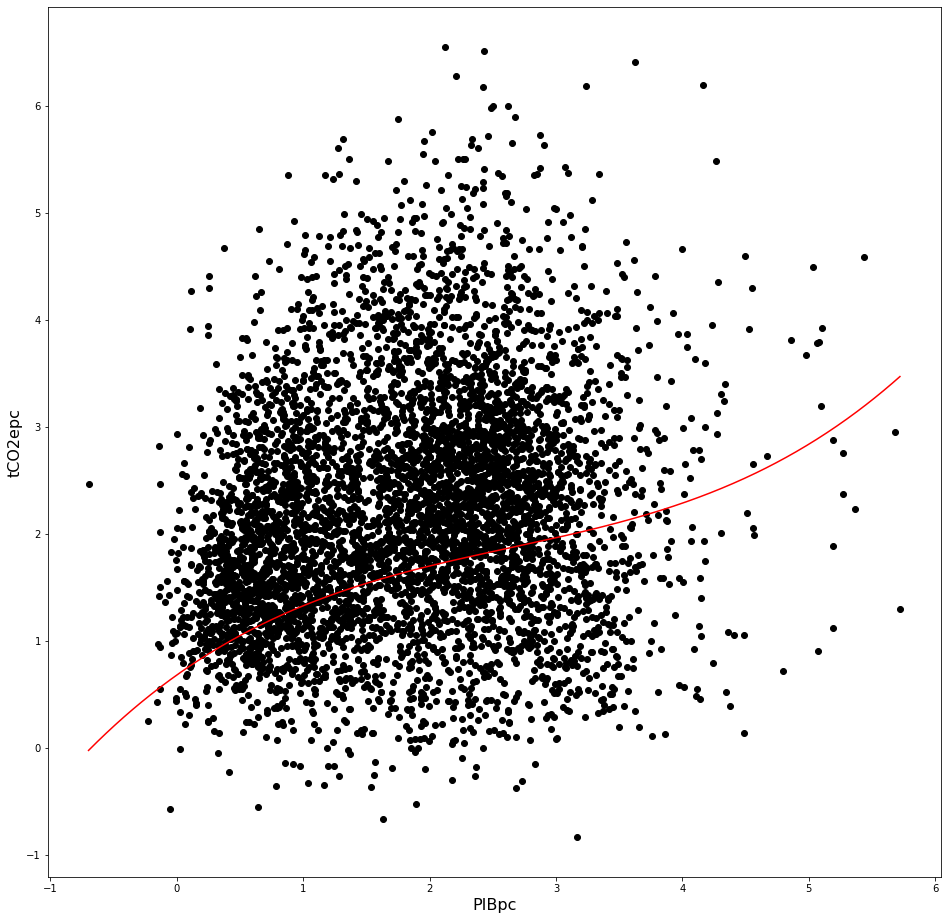

In [98]:
#Gráfico do Modelo cubico com participação do VA dos 3 setores no PIB 
plt.figure(figsize = (16,16))
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01)
ymod6 = 0.6799 + 0.8402*g -0.2213*(g*g) + 0.0279*(g*g*g)

ax1 = plt.subplot()
ax1.set_xlabel('PIBpc', fontsize=16)
ax1.set_ylabel('tCO2epc', fontsize=16)
ax1.plot(g,ymod6 , color='red')
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

In [99]:
# Modelo cubico com impacto regional e VA dos setores do PIB
modelo = sm.OLS(dados_df[Y],matrix7)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     588.7
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:18:29   Log-Likelihood:                -5755.8
No. Observations:                5550   AIC:                         1.154e+04
Df Residuals:                    5538   BIC:                         1.162e+04
Df Model:                          11                                         
Covariance Type:                  HAC                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4957      0.131     -3.788   

11615.104911557028

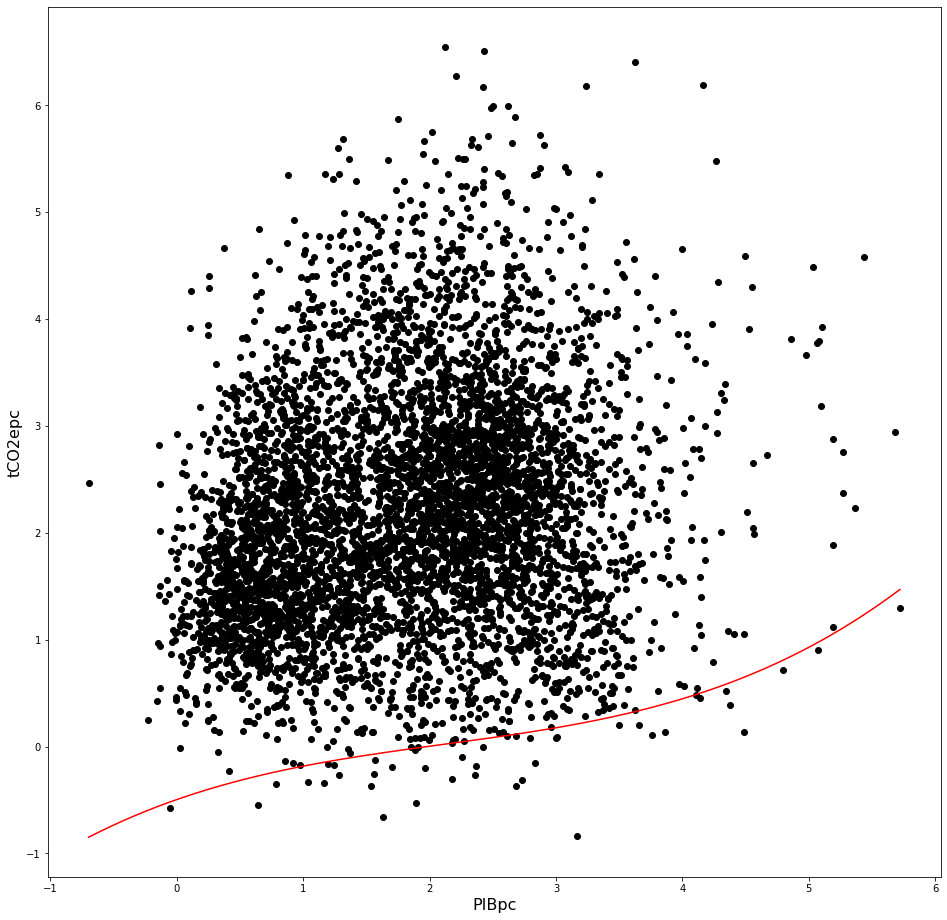

In [100]:
#Gráfico do Modelo cubico com impacto regional e VA dos setores do PIB
plt.figure(figsize = (16,16))
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01)
ymod7 = -0.4957 + 0.4129*g -0.1191*(g*g) + 0.0187*(g*g*g)

ax1 = plt.subplot()
ax1.set_xlabel('PIBpc', fontsize=16)
ax1.set_ylabel('tCO2epc', fontsize=16)
ax1.plot(g,ymod7 , color='red')
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

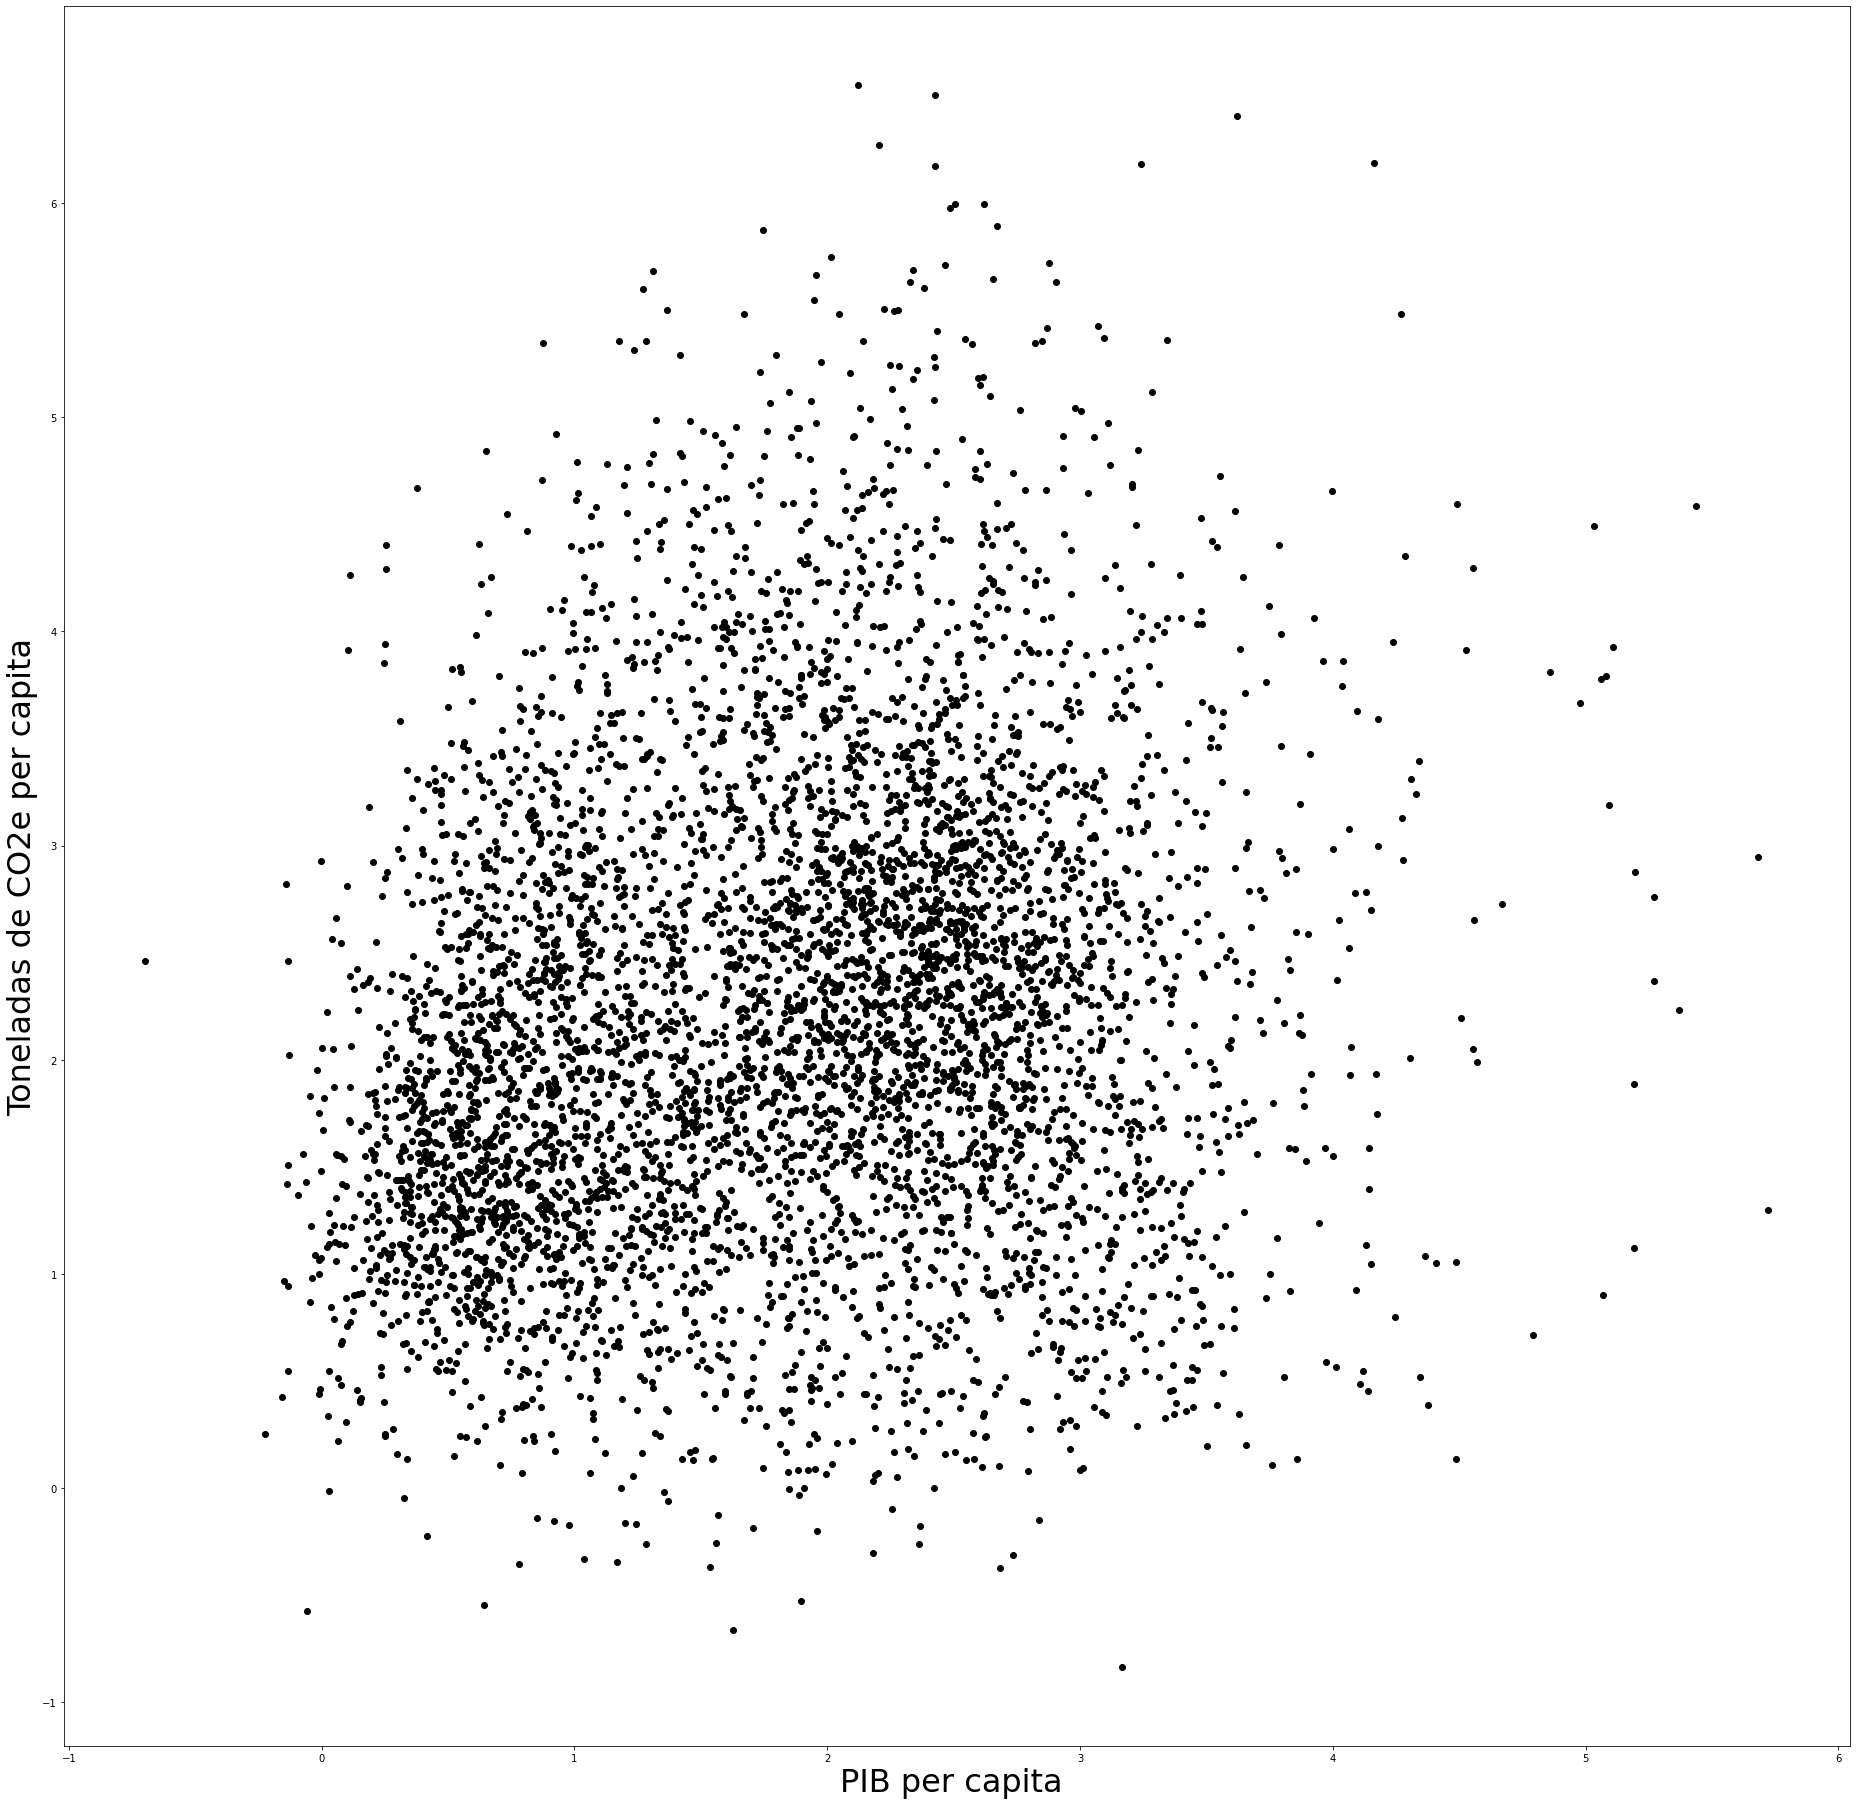

In [101]:
#plotando o gráfico de dispersão das variáveis
plt.figure(figsize = (32,32))
plt.scatter(dados_df['PIBpc'],dados_df['tCO2epc'],c='black')
plt.xlabel("PIB per capita ",fontsize = 32)
plt.ylabel("Toneladas de CO2e per capita", fontsize = 32)
plt.show()

In [102]:
#?sm.OLS
#?sm.QuantReg

modeloq =sm.QuantReg(dados_df[Y],matrix2)
resq = modeloq.fit(q=0.15)

modeloq1 =sm.QuantReg(dados_df[Y],matrix2)
resq1 = modeloq1.fit(q=0.30)

modeloq2 =sm.QuantReg(dados_df[Y],matrix2)
resq2 = modeloq2.fit(q=0.45)

modeloq3 =sm.QuantReg(dados_df[Y],matrix2)
resq3 = modeloq3.fit(q=0.60)

modeloq4 =sm.QuantReg(dados_df[Y],matrix2)
resq4 = modeloq4.fit(q=0.75)

modeloq5 =sm.QuantReg(dados_df[Y],matrix2)
resq5 = modeloq5.fit(q=0.90)

const = [resq.params["const"],resq1.params["const"],resq2.params["const"],resq3.params["const"],resq4.params["const"],resq5.params["const"]]
param1 = [resq.params["PIBpc"],resq1.params["PIBpc"],resq2.params["PIBpc"],resq3.params["PIBpc"],resq4.params["PIBpc"],resq5.params["PIBpc"]]
param2 = [resq.params["PIBpc2"],resq1.params["PIBpc2"],resq2.params["PIBpc2"],resq3.params["PIBpc2"],resq4.params["PIBpc2"],resq5.params["PIBpc2"]]

#print(resq.summary())
#print(resq1.summary())
#print(resq2.summary())
#print(resq3.summary())
#print(resq4.summary())
print(resq5.summary())

                         QuantReg Regression Results                          
Dep. Variable:                tCO2epc   Pseudo R-squared:               0.2437
Model:                       QuantReg   Bandwidth:                      0.1693
Method:                 Least Squares   Sparsity:                        5.628
Date:                Wed, 16 Nov 2022   No. Observations:                 5550
Time:                        12:22:59   Df Residuals:                     5544
                                        Df Model:                            5
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7792      0.181      4.314      0.000       0.425       1.133
PIBpc          0.6538      0.091      7.168      0.000       0.475       0.833
PIBpc2        -0.0888      0.026     -3.439      0.001      -0.139      -0.038
Agro           0.2658      0.028      9.420      0.0

Text(0, 0.5, 'tCO2epc')

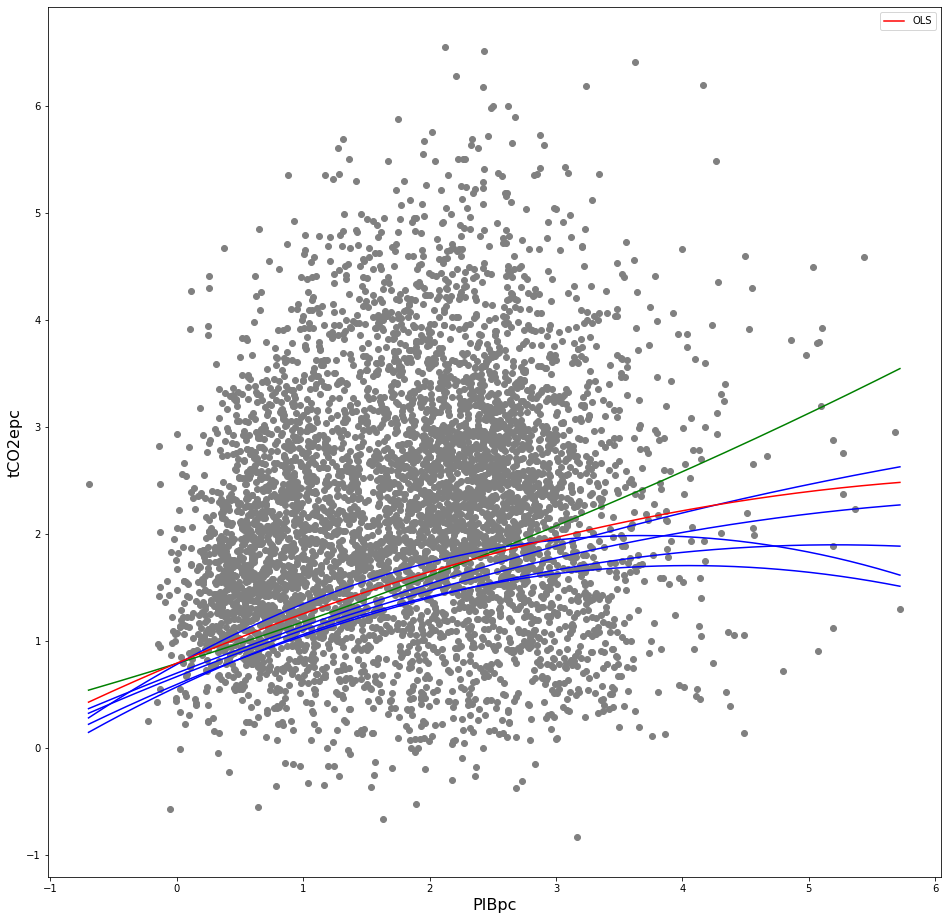

In [103]:
#Regressão Quantilica com o modelo quadrático
x = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01)
   
y0 = 0.7873 + 0.3700*(x) + 0.0195*(x*x)
y1 = 0.6979 + 0.4604*(x) -0.0216*(x*x)
y2 = 0.6651 + 0.4674*(x) -0.0327*(x*x)
y3 = 0.5925 + 0.5003*(x) -0.0480*(x*x)
y4 = 0.5688 + 0.5597*(x) -0.0691*(x*x)
y5 = 0.7792 + 0.6538*(x) -0.0888*(x*x)
    

#display(y2)
fig, ax = plt.subplots(figsize=(16, 16))


ax.plot(x, y0, color="green")
ax.plot(x, y1, color="blue")
ax.plot(x, y2, color="blue")
ax.plot(x, y3, color="blue")
ax.plot(x, y4, color="blue")
ax.plot(x, y5, color="blue")



ax.plot(x, ymod2, color="red", label="OLS")
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'grey')
legend = ax.legend()
ax.set_xlabel("PIBpc", fontsize=16)
ax.set_ylabel("tCO2epc", fontsize=16)

In [104]:
#?sm.OLS
#?sm.QuantReg

modeloq6 =sm.QuantReg(dados_df[Y],matrix4)
resq6 = modeloq6.fit(q=0.15)

modeloq7 =sm.QuantReg(dados_df[Y],matrix4)
resq7 = modeloq7.fit(q=0.30)

modeloq8 =sm.QuantReg(dados_df[Y],matrix4)
resq8 = modeloq8.fit(q=0.45)

modeloq9 =sm.QuantReg(dados_df[Y],matrix4)
resq9 = modeloq9.fit(q=0.60)

modeloq10 =sm.QuantReg(dados_df[Y],matrix4)
resq10 = modeloq10.fit(q=0.75)

modeloq11 =sm.QuantReg(dados_df[Y],matrix4)
resq11 = modeloq11.fit(q=0.90)

const = [resq6.params["const"],resq7.params["const"],resq8.params["const"],resq9.params["const"],resq10.params["const"],resq11.params["const"]]
param1 = [resq6.params["PIBpc"],resq7.params["PIBpc"],resq8.params["PIBpc"],resq9.params["PIBpc"],resq10.params["PIBpc"],resq11.params["PIBpc"]]
param2 = [resq6.params["PIBpc2"],resq7.params["PIBpc2"],resq8.params["PIBpc2"],resq9.params["PIBpc2"],resq10.params["PIBpc2"],resq11.params["PIBpc2"]]
param3 = [resq6.params["PIBpc3"],resq7.params["PIBpc3"],resq8.params["PIBpc3"],resq9.params["PIBpc3"],resq10.params["PIBpc3"],resq11.params["PIBpc3"]]

#print(resq6.summary())
#print(resq7.summary())
#print(resq8.summary())
#print(resq9.summary())
#print(resq10.summary())
print(resq11.summary())

                         QuantReg Regression Results                          
Dep. Variable:                tCO2epc   Pseudo R-squared:              0.04775
Model:                       QuantReg   Bandwidth:                      0.2286
Method:                 Least Squares   Sparsity:                        7.892
Date:                Wed, 16 Nov 2022   No. Observations:                 5550
Time:                        12:23:01   Df Residuals:                     5546
                                        Df Model:                            3
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0773      0.158     13.177      0.000       1.768       2.386
PIBpc          2.0684      0.277      7.454      0.000       1.524       2.612
PIBpc2        -0.7289      0.132     -5.524      0.000      -0.988      -0.470
PIBpc3         0.0799      0.018      4.407      0.0

Text(0, 0.5, 'tCO2epc')

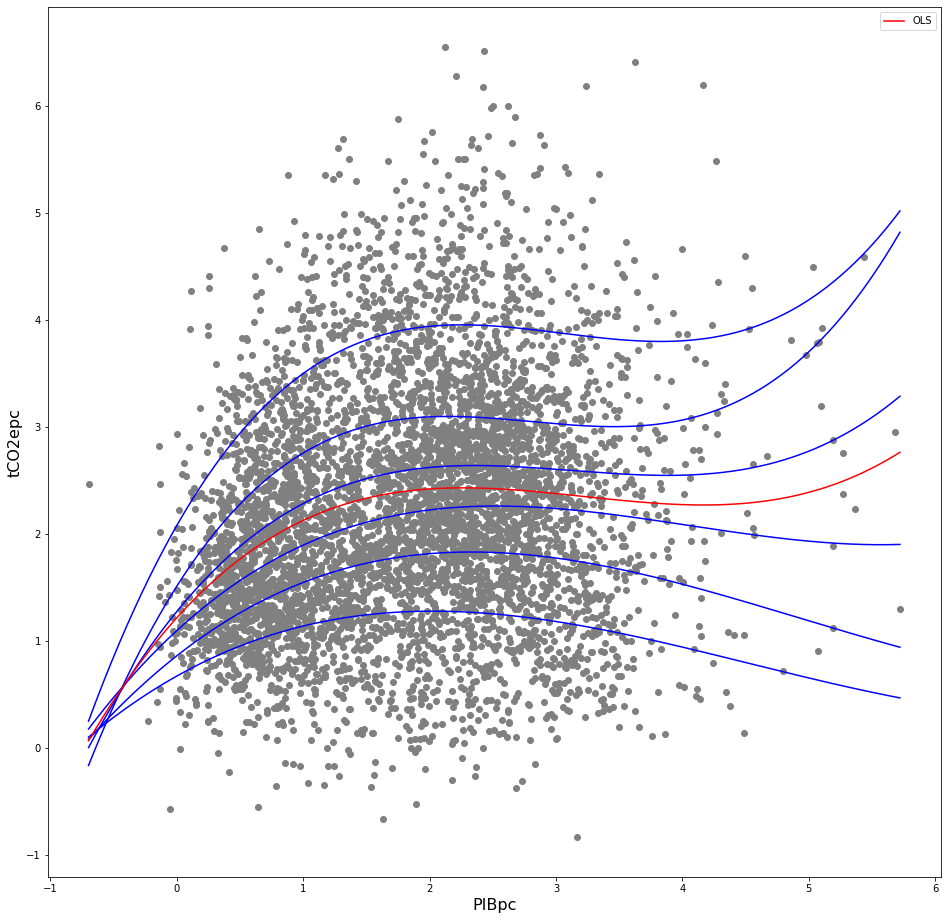

In [106]:
#Regressão Quantilica com o modelo cubico
x1 = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01)
   
y6 =  0.6703 + 0.6624*(x1) -0.2107*(x1*x1) + 0.0155*(x1*x1*x1)
y7 =  0.8596 + 0.9284*(x1) -0.2611*(x1*x1) + 0.0177*(x1*x1*x1)
y8 =  1.0948 + 1.0851*(x1) -0.3121*(x1*x1) + 0.0257*(x1*x1*x1)
y9 =  1.2738 + 1.4494*(x1) -0.4940*(x1*x1) + 0.0528*(x1*x1*x1)
y10 = 1.5101 + 1.8643*(x1) -0.7043*(x1*x1) + 0.0838*(x1*x1*x1)
y11 = 2.0773 + 2.0684*(x1) -0.7289*(x1*x1) + 0.0799*(x1*x1*x1)
    

#display(y2)
fig, ax = plt.subplots(figsize=(16, 16))


ax.plot(x1, y6, color="blue")
ax.plot(x1, y7, color="blue")
ax.plot(x1, y8, color="blue")
ax.plot(x1, y9, color="blue")
ax.plot(x1, y10, color="blue")
ax.plot(x1, y11, color="blue")



ax.plot(x1, ymod4, color="red", label="OLS")
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'grey')
legend = ax.legend()
ax.set_xlabel("PIBpc", fontsize=16)
ax.set_ylabel("tCO2epc", fontsize=16)